In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load data
train_df = pd.read_csv("train.csv")

In [3]:
# Display first few rows of the dataframe
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Display the shape of the dataframe
train_df.shape

(1460, 81)

In [5]:
# Display dataframe info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_df["SalePrice"].head()


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [7]:
train_df["SalePrice"].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

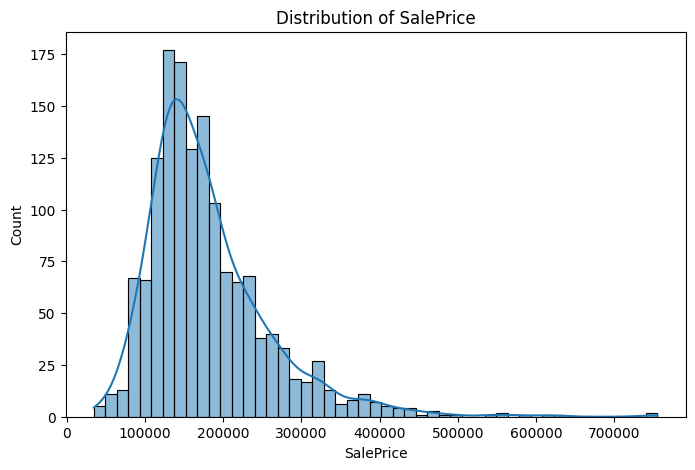

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

#Graph is right skewed, therefore we have to apply log transformation to make it normal distributed


In [9]:
# Splitting features and target variable
X = train_df.drop(["SalePrice"], axis=1)
y = np.log1p(train_df["SalePrice"])

In [10]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numerical columns: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBa

In [11]:
# Pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])



In [12]:
# Preprocessing
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

model = Pipeline([
    ("prep", preprocessor),
    ("lr", LinearRegression())
])



In [13]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
pred = model.predict(X_val)


In [14]:
lr_rmse = np.sqrt(mean_squared_error(y_val, pred))
lr_r2 = r2_score(y_val, pred)

print("Linear regression RMSE:", lr_rmse)
print("Linear regression R2 Score:", lr_r2)

Linear regression RMSE: 0.13212753970365626
Linear regression R2 Score: 0.906448774104145


In [15]:
# Training and evaluating a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(
        random_state=42,
        max_depth=10
    ))
])

dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_val)

dt_rmse = np.sqrt(mean_squared_error(y_val, dt_pred))
dt_r2 = r2_score(y_val, dt_pred)
print("Decision Tree RMSE:", dt_rmse)
print("Decision Tree R2 Score:", dt_r2)


Decision Tree RMSE: 0.20063179840316828
Decision Tree R2 Score: 0.7842939537760125


In [16]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_val)

rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred))
rf_r2 = r2_score(y_val, rf_pred)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2 Score:", rf_r2)


Random Forest RMSE: 0.14524557218392856
Random Forest R2 Score: 0.8869505145514415


In [17]:
# xgboost
from xgboost import XGBRegressor

xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_val)

xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_pred))
xgb_r2 = r2_score(y_val, xgb_pred)
print("XGBoost RMSE:", xgb_rmse)
print("XGBoost R2 Score:", xgb_r2)


XGBoost RMSE: 0.1324547737911396
XGBoost R2 Score: 0.9059848124019145


In [18]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "XGBoost"
    ],
    "RMSE_log": [
        lr_rmse,        
        dt_rmse,
        rf_rmse,
        xgb_rmse
    ],
    "R2_score": [
        lr_r2,
        dt_r2,
        rf_r2,
        xgb_r2
    ]
})
results

,Model,RMSE_log,R2_score
0,Linear Regression,0.132128,0.906449
1,Decision Tree,0.200632,0.784294
2,Random Forest,0.145246,0.886951
3,XGBoost,0.132455,0.905985


In [22]:
# Fit best model (XGBoost here) on full data and create submission file
best_model = xgb_model
best_model.fit(X, y)

# Load test data and predict
test_df = pd.read_csv("test.csv")

# Predict on test set using log target, then undo log transform
log_preds = best_model.predict(test_df)
saleprice_preds = np.expm1(log_preds)

# Build submission DataFrame
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": saleprice_preds
})

# Save to CSV for Kaggle
submission.to_csv("submission.csv", index=False)
submission.head()

,Id,SalePrice
0,1461,126905.328125
1,1462,156733.546875
2,1463,182234.359375
3,1464,194323.781250
4,1465,182484.437500
